In [443]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import svm, datasets, linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import re

In [444]:
train_df = pd.read_csv("./data/train.csv")
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [445]:
train_df[train_df['target'] == 1]['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

<AxesSubplot:xlabel='target', ylabel='count'>

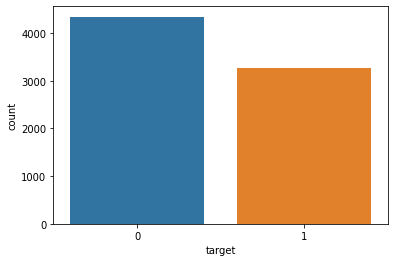

In [446]:
sns.countplot(x = 'target', data = train_df)

Balanced classes

In [447]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [448]:
def clean_text(text):
    text = re.sub('\d*', '', text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', text)
    text = re.sub('#', '', text)                                             
    text = re.sub('@', '', text)
    text = re.sub(',', '', text)
    text = re.sub(':', '', text)
    text = re.sub('amp', '', text)
    #text = re.sub('В‰Г›_', '', text)
    text = re.sub('û_', '', text)
    return text.lower()

In [449]:
train_df['text'] = train_df['text'].apply(clean_text)
train_df['text']

0       our deeds are the reason of this earthquake ma...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3        people receive wildfires evacuation orders in...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria_ahrary thetawniest the out of control wil...
7610                   m. [ utc]?km s of volcano hawaii. 
7611    police investigating after an e-bike collided ...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [450]:
def show_rep_words(texts):
    d = {}
    for text in texts:
        tokens = re.findall('\w+-?\w*', text)
        for token in tokens:
            if token not in d.keys():
                d[token] = 1
            else:
                d[token] += 1
    sort_keys = sorted(d, key=d.get, reverse=True)
    sorted_dict = {}
    for w in sort_keys:
        sorted_dict[w] = d[w]
    print(sorted_dict)

Showing the freq of words before cleaning from stopwords:

In [451]:
show_rep_words(train_df[train_df['target'] == 0]['text'])  # 0 class

{'the': 1895, 'i': 1388, 'a': 1256, 'to': 1176, 'and': 896, 'of': 887, 'in': 814, 'you': 755, 'is': 592, 's': 544, 'my': 544, 'it': 535, 'for': 487, 'on': 429, 'that': 410, 'with': 377, 't': 338, 'this': 297, 'be': 287, 'me': 262, 'like': 253, 'so': 242, 'have': 242, 'by': 239, 'are': 237, 'just': 234, 'm': 232, 'your': 229, 'at': 228, 'but': 226, 'was': 217, 'not': 205, 'can': 196, 'out': 196, 'up': 194, 'all': 190, 'if': 184, 'he': 184, 'we': 179, 'will': 178, 'û_': 177, 'from': 175, 'new': 163, 'get': 163, 'as': 163, 'they': 159, 'or': 156, 'what': 151, 'now': 147, 'when': 146, 'no': 144, 'has': 144, 'about': 139, 'don': 138, 'an': 131, 'how': 128, 'one': 128, 'do': 125, 'there': 117, 're': 114, 'body': 112, 'would': 101, 'his': 98, 'been': 97, 'her': 97, 'into': 96, 'people': 94, 'love': 89, 'more': 89, 'why': 87, 'know': 85, 'got': 85, 'who': 85, 'them': 82, 'back': 82, 'video': 82, 'day': 81, 'time': 81, 'full': 81, 'see': 80, 'emergency': 80, 'u': 77, 'after': 76, 'let': 76, 'go

In [452]:
show_rep_words(train_df[train_df['target'] == 1]['text'])  # 1 class

{'the': 1342, 'in': 1141, 'a': 924, 'of': 918, 'to': 747, 'and': 493, 'on': 414, 'for': 391, 'i': 381, 's': 364, 'is': 348, 'at': 306, 'by': 271, 'from': 243, 'it': 236, 'that': 207, 'with': 188, 'this': 181, 'after': 180, 'fire': 179, 'û_': 173, 'was': 169, 'as': 167, 'are': 165, 'you': 143, 'have': 143, 'news': 139, 't': 139, 'my': 134, 'up': 125, 'over': 124, 'an': 122, 'disaster': 120, 'more': 120, 'california': 114, 'we': 114, 'be': 113, 'suicide': 109, 'no': 107, 'police': 107, 'people': 105, 'who': 102, 'has': 102, 'when': 96, 'but': 96, 'not': 93, 'been': 93, 'like': 93, 'were': 92, 'hiroshima': 92, 'm': 89, 'just': 87, 'killed': 87, 'storm': 87, 'pm': 86, 'than': 85, 'fires': 83, 'families': 81, 'into': 78, 'train': 78, 'will': 78, 'crash': 77, 'so': 76, 'emergency': 75, 'out': 75, 'bomb': 75, 'buildings': 75, 'now': 74, 'about': 73, 'mh': 73, 'what': 72, 'two': 72, 'there': 71, 'they': 71, 'all': 70, 'nuclear': 70, 'attack': 68, 'video': 68, 'wildfire': 68, 'accident': 67, 'b

Cleaning from stopwords

In [480]:
nltk.download('stopwords')
stopwords = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'list' object has no attribute 'words'

In [496]:
def filter_stopwords(text):
    tokens = re.findall('\w+-?\w*', text) 
    text = ' '.join([token for token in tokens if (token not in stopwords) & (token.isalpha())])
    return text
      

In [497]:
train_df['text'] = train_df['text'].apply(filter_stopwords)

Showing the freq of words again after cleaning from stopwords:

In [498]:
show_rep_words(train_df[train_df['target'] == 0]['text'])  # 0 class

{'like': 253, 'new': 163, 'get': 163, 'one': 128, 'body': 112, 'would': 101, 'people': 94, 'love': 89, 'know': 85, 'got': 85, 'back': 82, 'video': 82, 'day': 81, 'time': 81, 'full': 81, 'see': 80, 'emergency': 80, 'u': 77, 'let': 76, 'going': 75, 'us': 73, 'still': 72, 'fire': 71, 'go': 67, 'want': 67, 'good': 67, 'think': 66, 'w': 65, 'man': 64, 'world': 62, 'lol': 61, 'life': 59, 'first': 59, 'youtube': 58, 'way': 57, 'rt': 57, 'news': 57, 'last': 56, 'gt': 56, 'make': 55, 'really': 55, 'need': 55, 'û': 55, 'burning': 55, 'reddit': 55, 'work': 53, 'best': 53, 'much': 51, 'many': 51, 'even': 51, 'take': 50, 'say': 49, 'read': 47, 'help': 47, 'great': 47, 'black': 47, 'right': 46, 'god': 46, 'wreck': 46, 'feel': 46, 'ûªs': 46, 'content': 46, 'could': 45, 'today': 45, 'look': 44, 'every': 44, 'im': 44, 'hot': 44, 'fear': 44, 'never': 43, 'bags': 43, 'ass': 42, 'top': 41, 'ever': 41, 'fucking': 40, 'cross': 40, 'another': 39, 'everyone': 39, 'come': 39, 'night': 38, 'check': 38, 'year': 

In [499]:
show_rep_words(train_df[train_df['target'] == 1]['text'])  # 1 class

{'fire': 179, 'news': 139, 'disaster': 120, 'california': 114, 'suicide': 109, 'police': 107, 'people': 105, 'like': 93, 'hiroshima': 92, 'killed': 87, 'storm': 87, 'pm': 86, 'fires': 83, 'families': 81, 'train': 78, 'crash': 77, 'emergency': 75, 'bomb': 75, 'buildings': 75, 'mh': 73, 'two': 72, 'nuclear': 70, 'attack': 68, 'video': 68, 'wildfire': 68, 'accident': 67, 'bombing': 67, 'one': 65, 'burning': 64, 'get': 63, 'dead': 63, 'northern': 63, 'legionnaires': 61, 'bomber': 59, 'car': 58, 'war': 58, 'u': 57, 'still': 57, 'obama': 57, 'homes': 57, 'atomic': 56, 'today': 55, 'new': 54, 'japan': 54, 'fatal': 54, 'years': 53, 'collapse': 52, 'may': 50, 'debris': 50, 'watch': 50, 'forest': 49, 'malaysia': 49, 'first': 48, 'near': 47, 'man': 47, 'latest': 47, 'water': 47, 'severe': 47, 'mass': 47, 'us': 46, 'home': 46, 'û': 45, 'confirmed': 45, 'rt': 44, 'found': 44, 'injured': 44, 'city': 44, 'world': 43, 'oil': 43, 'earthquake': 42, 'th': 42, 'warning': 42, 'spill': 42, 'floods': 42, 'ar

Стемминг

In [500]:
stemmer = PorterStemmer()
def stemming(text):
    tokens = re.findall('\w+-?\w*', text)
    text = ' '.join([stemmer.stem(token) for token in tokens])
    return text

In [501]:
train_df['text'] = train_df['text'].apply(stemming)
train_df['text'].head()

0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: text, dtype: object

Split data into train-val-test:

In [502]:
X_train, X_val, y_train, y_val = train_test_split(train_df, train_df.target, train_size = 0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, X_train.target, train_size = 0.8, random_state=42)

In [503]:
word_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), max_features=100000) 

In [504]:
word_vectorizer.fit(X_train['text'])
train_w_features = word_vectorizer.transform(X_train['text'])
val_w_features = word_vectorizer.transform(X_val['text'])
test_w_features = word_vectorizer.transform(X_test['text']) #

Choosing the best parameter:C:[1e-4, 1e-2, 1, 10, 100]

In [505]:
grid={'C':[1e-4, 1e-2, 1, 10, 100]}
logreg=LogisticRegression(max_iter=5000)
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring='accuracy')
logreg_cv.fit(train_w_features, y_train)
preds = logreg_cv.predict(val_w_features)
print(logreg_cv.best_score_)
print(logreg_cv.best_params_)

0.7939176793348368
{'C': 1}


Test:

In [506]:
logreg = LogisticRegression(C=1, solver='sag')               
logreg.fit(train_w_features, y_train)
preds = logreg.predict(test_w_features)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       703
           1       0.83      0.68      0.75       515

    accuracy                           0.80      1218
   macro avg       0.81      0.79      0.79      1218
weighted avg       0.81      0.80      0.80      1218



Cross-validation:

In [507]:
scores = cross_val_score(logreg, test_w_features, y_test, cv=5, scoring='accuracy')
scores.mean()

0.7512244484922082